In [1]:
# muldrow analysis

In [2]:
import geopandas as gpd
import os
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import rioxarray
import pandas as pd

In [3]:
geo_crop_dir = './import_data/import_sar_asf_script/sar_images_geocoded_cropped'

In [4]:
muldrow = gpd.read_file('./import_data/import_glacier_shapefiles_rgi/rgi_data/muldrow_glacier.geojson')

In [5]:
file_list = []
date_list = []
for file in os.listdir(geo_crop_dir):
    if file != '.ipynb_checkpoints':
        file_list.append(file)
        date = pd.to_datetime(file[14:29])
        date_list.append(date)

In [6]:
date_list.sort()
file_list.sort()

<ipython-input-7-4ee14e2a45db>:4: RuntimeWarning: divide by zero encountered in log
  ax[i].imshow(np.log(sar_image))


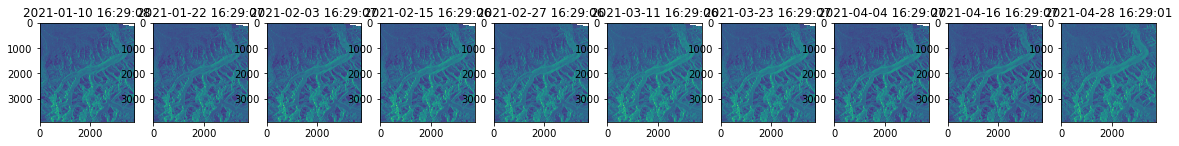

In [7]:
f,ax=plt.subplots(1,len(file_list),figsize=(20,20))
for i,file in enumerate(file_list):
    sar_image = plt.imread(f'{geo_crop_dir}/{file}')
    ax[i].imshow(np.log(sar_image))
    ax[i].set_title(date_list[i])

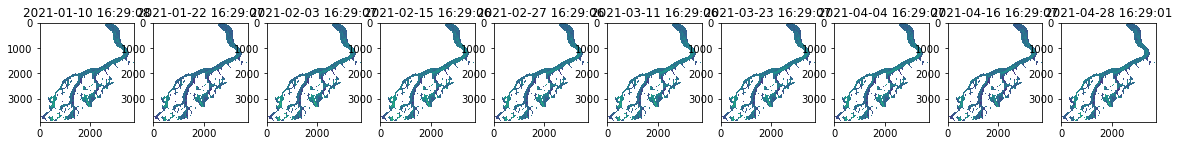

In [8]:
f,ax=plt.subplots(1,len(file_list),figsize=(20,20))
for i,file in enumerate(file_list):
    sar_image = rioxarray.open_rasterio(f'{geo_crop_dir}/{file}',masked=True,from_disk=True).rio.clip(muldrow.geometry,muldrow.crs, drop=False, invert=False)
    #sar_image.plot(ax=ax[i])
    sar_image = sar_image.squeeze()
    ax[i].imshow(np.log(sar_image))
    ax[i].set_title(date_list[i])

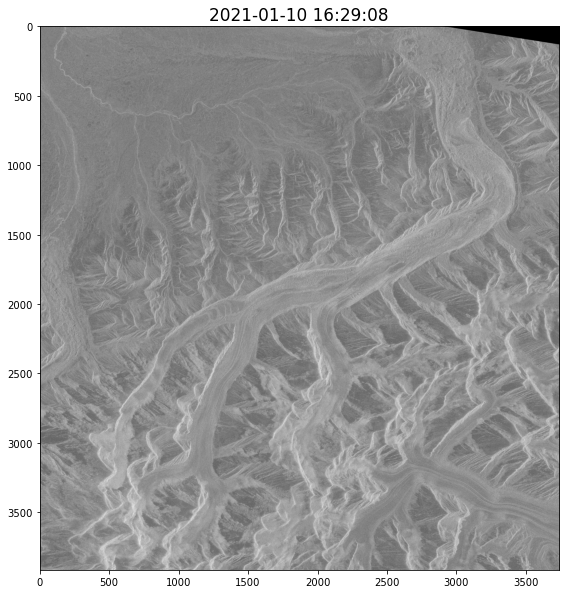

In [9]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

f,ax=plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 14})


sar_image = plt.imread(f'{geo_crop_dir}/{file_list[0]}')
im = ax.imshow(np.log(sar_image,where=(sar_image!=0)),cmap='gray')
ax.set_title(date_list[0])

def update(frame):
    sar_image = plt.imread(f'{geo_crop_dir}/{file_list[frame]}')
    im.set_data(np.log(sar_image,where=(sar_image!=0)))
    ax.set_title(date_list[frame])

#rc('animation', embed_limit=40971520.0)

ani = FuncAnimation(f, update, frames=len(file_list), blit=False, interval=300)
#plt.show(block=False)

In [10]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [13]:
ani.save('muldrow_timeseries.gif', writer='pillow', fps=2)

In [11]:
#TODO: 